## Regression

#### Linear regression
###### Simple regression: one input -> one output
###### Multple regression: many inputs -> one output

#### Non-linear regression
###### inputs -> non-linear function -> output

#### Simple Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Line representation
# y = mx + c == price = m * area + b
df = pd.read_csv('homeprices.csv')
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


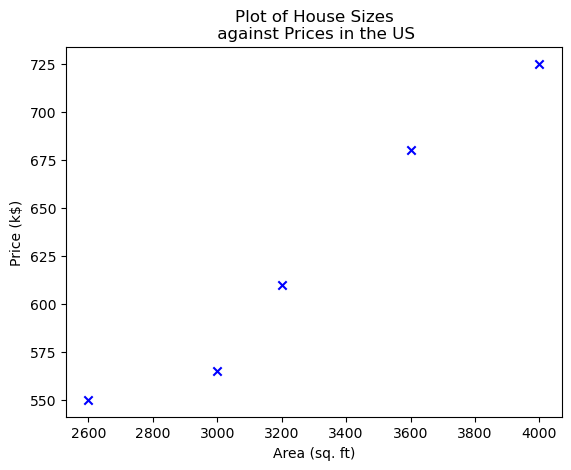

In [8]:
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (k$)')
plt.title('Plot of House Sizes\n against Prices in the US')
plt.scatter(x=df.Area, y=(df.Price/1000), c='blue', marker='x')

In [24]:
reg = LinearRegression()
reg.fit(df[['Area']].values, df.Price.values)

LinearRegression()

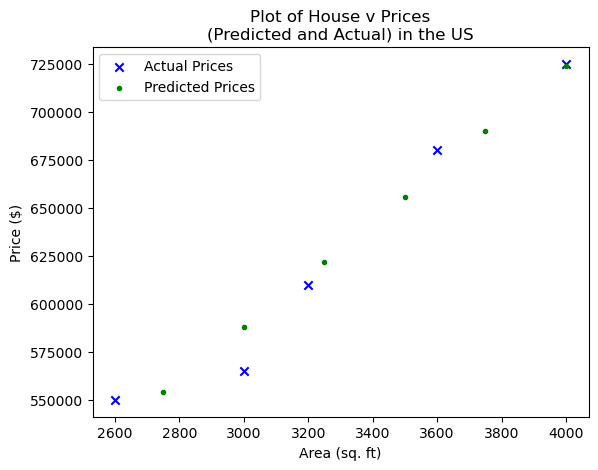

In [32]:
house_areas_to_predict = [2750, 3000, 3250, 3500, 3750, 4000]
house_areas_to_predict = np.array(house_areas_to_predict).reshape(-1, 1)
predicted_prices = reg.predict(house_areas_to_predict)
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price ($)')
plt.title('Plot of House v Prices\n(Predicted and Actual) in the US')
plt.scatter(x=df.Area, y=df.Price, c='blue', marker='x')
plt.scatter(x=house_areas_to_predict, y=predicted_prices, c='green', marker='.')
plt.legend(['Actual Prices', 'Predicted Prices'])

In [33]:
# house_areas_to_predict = [2750, 3000, 3250, 3500, 3750, 4000] -> x
print(reg.predict(house_areas_to_predict)) # y
print(reg.coef_) # m
print(reg.intercept_) # c

[554032.53424658 587979.45205479 621926.36986301 655873.28767123
 689820.20547945 723767.12328767]
[135.78767123]
180616.43835616432


In [34]:
# y = mx + c
135.78767123 * 2750 + 180616.43835616432 # = 554032.53424658

554032.5342386643

##### Multiple Linear Regression

In [37]:
# y = m1x1 + m2x2 + m3x3 + m4x4 +c
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
# 4 independent variables and 1 dependent variable (Profit)
X = dataset.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [43]:
Y = dataset.iloc[:, -1].values
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [44]:
from sklearn.compose import ColumnTransformer # for Catrgorical Variable Transformation
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [45]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test)
dataframe = pd.DataFrame({'Real Values': Y_test, 'Predicted Values':y_pred})
dataframe

,Real Values,Predicted Values
0,81229.06,66686.585324
1,49490.75,58587.232474
2,149759.96,155988.983507
3,155752.60,161855.598398
4,99937.59,98586.126121
5,156122.51,157512.847844
6,122776.86,111051.260043
7,118474.03,118278.404854
8,69758.98,56372.883795
9,97427.84,97850.453532


## Model Evaluation for Regression
###### Mean Absolute Error (MAE)
###### Mean Squared Error (MSE)
###### Root Mean Squared Error (RMSE)

In [48]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_true=Y_test, y_pred=y_pred)))

8312.223034191627
